# Introdução
Animal Crossing New Horizons é um jogo de simulação, desenvolvido e lançado em 2020 pela Nintendo. Nele, o jogador é um novo morador de uma ilha deserta, que pode ser populada por diversos outros personagens, animais antropomorfizados.
A seguir, usaremos um dataset com informações de todos os personagens "villagers" do jogo (os personagens considerados NPCs não serão considerados aqui) em conjunto com um ranking de popularidade encontrado no site https://gamewith.net/animal-crossing-new-horizons/article/show/18171 para tentar inferir quais fatores mais afetam a popularidade dos personagens.

In [59]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Opção para ver os dataframes inteiros
#pd.set_option('display.max_rows', None)

chars = pd.read_csv('datasets/ac_villagers.csv')
rank = pd.read_csv('datasets/ac_villagers_rank.csv')

## Analisando e Organizando Dataframe Chars

In [60]:
# Célula de teste

chars.info()
chars.describe()
# chars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
count,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
unique,391,35,2,8,6,361,388,89,6,6,14,14,154,128,391,391,391
top,Bones,Cat,Male,Lazy,Fitness,7-Dec,quacko,Forest Life,Simple,Simple,Black,Red,backyard-fence wall,backyard lawn,3449;1127;915;3974;3957;4129;1058;3442;3443;14...,bul00,dqEHTSBSx5iLhGiSC
freq,1,23,204,60,66,2,2,15,118,110,47,53,13,13,1,1,1


#### Acima podemos observar que:
- Existem 35 espécies diferentes de animais
- Existem 8 tipos de personalidade
- Existem 6 tipos de hobbies
- Existem 6 tipos diferentes de estilos
- Existem 14 cores diferentes

#### Maiores grupos:
- A maioria dos personagens é da espécie __'Cat'__
- A maioria dos personagens possui a personalidade __'Lazy'__
- A maioria dos personagens tem como hobby __'Fitness'__
- A maioria dos personagens possui aniversário em __Outubro__

#### Gênero:
- Aproximadamente 52,1% dos personagens são do gênero __masculino__ (204/391)
- Aproximadamente 47,8% personagens são do gênero __feminino__ (187/391)

#### Outros:
Cada personagem está associado a dois valores para 'Style' e para 'Color'
<br>
Não existe nenhuma entrada com valores vazios.
<br>


In [61]:
# Tratando Dataframe "Char"

# Removendo colunas irrelevantes:
del chars['Furniture List']
del chars['Filename']
del chars['Unique Entry ID']
del chars['Catchphrase']
del chars['Favorite Song']
del chars['Wallpaper']
del chars['Flooring']

# Formatando aniversário:
chars['Birthday'] = chars['Birthday'].str.split('-')
for i, r in chars.iterrows():
    aux = r['Birthday'][1]
    chars.at[i, 'Birthday'] = aux

## Analisando e Organizando Dataframe Ranks

In [62]:
# Célula de teste

rank.info()
rank.describe()
# rank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         451 non-null    int64 
 1   Villager     451 non-null    object
 2   Personality  391 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.7+ KB


,Rank
count,451.000000
mean,226.000000
std,130.336743
min,1.000000
25%,113.500000
50%,226.000000
75%,338.500000
max,451.000000


Podemos observar que o df ranking possui 451 entradas, 60 a mais em relação ao df dos personagens, isso se deve à presença dos personagens "NPCs" mencionados anteriormente.
<br>
Ao observar os valores não nulos na coluna 'Personality', observamos que a quantidade de entradas é 391, exatamente a mesma quantidade de entradas no dataframe 'chars'. 
<br>
É fácil inferir que esses registros sem 'Personality' são os NPCs que estão presentes no dataset "em excesso", portanto vamos usar o método dropna() para removê-los.
<br>
Vamos aproveitar também para limpar a coluna 'Personality', que já existe no df __'chars'__ e se tornará redundante.

In [63]:
# Tratando dataframe "Rank"

rank = rank.dropna(0, 'any')    # Removendo personagens NPCs
del rank['Personality']
rank = rank.rename(columns={"Villager": "Name"})    # Renomeando para combinar com a coluna do df "chars"

## Unindo os dois dataframes

In [64]:
df = pd.merge(chars, rank, on='Name', how='outer')
df = df.dropna(0, 'any')    # gambiarra: os datasets não coincidem 100%, há uma diferença de 2 personagens em cada um, totalizando 4 registros incompletos ao unir as tabelas. 
# Na minha opnião, dado o escopo e não-seriedade do projeto, não há problema em descartar os 4 registros, mas tenho consciência de que não é uma atitude correta no tratamento dos dados.

df = df.sort_values(['Rank'])   # Ordenando o dataframe pelo ranking dos personagens.
df

,Name,Species,Gender,Personality,Hobby,Birthday,Style 1,Style 2,Color 1,Color 2,Rank
298,Raymond,Cat,Male,Smug,Nature,Oct,Elegant,Cool,Black,Gray,1.0
228,Marshal,Squirrel,Male,Smug,Music,Sep,Elegant,Cool,Light blue,Blue,2.0
227,Marina,Octopus,Female,Normal,Music,Jun,Cute,Cute,Pink,Red,3.0
390,Zucker,Octopus,Male,Lazy,Nature,Mar,Simple,Cute,Blue,Yellow,4.0
329,Sherb,Goat,Male,Lazy,Nature,Jan,Simple,Cute,Gray,Blue,5.0
...,...,...,...,...,...,...,...,...,...,...,...
381,Wart Jr.,Frog,Male,Cranky,Education,Aug,Simple,Simple,Blue,Purple,403.0
260,Pancetti,Pig,Female,Snooty,Music,Nov,Cute,Gorgeous,Red,Yellow,404.0
160,Greta,Mouse,Female,Snooty,Education,Sep,Elegant,Simple,Pink,Purple,405.0
57,Broffina,Chicken,Female,Snooty,Music,Oct,Gorgeous,Elegant,Black,Red,406.0


## Análises

### Ranking por Espécie

Species
Alligator    184.714286
Anteater     234.571429
Bear         248.866667
Bird         268.538462
Bull         282.333333
Cat          119.173913
Chicken      263.444444
Cow          220.750000
Cub          129.125000
Deer          73.800000
Dog          127.687500
Duck         190.294118
Eagle        211.555556
Elephant     207.454545
Frog         237.944444
Goat         150.750000
Gorilla      308.888889
Hamster      144.250000
Hippo        276.714286
Horse        228.600000
Kangaroo     285.125000
Koala        139.888889
Lion         256.142857
Monkey       240.250000
Mouse        312.466667
Octopus       18.333333
Ostrich      164.400000
Penguin      173.083333
Pig          286.600000
Rabbit       182.950000
Rhino        154.000000
Sheep        188.461538
Squirrel     180.388889
Tiger        198.857143
Wolf          71.727273
Name: Rank, dtype: float64

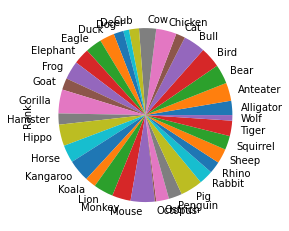

In [65]:
species = df.groupby('Species')['Rank'].mean()  # Média de ranking por espécie
# species.plot(kind='pie')
species

### Ranking por Personalidade

Personality
Big Sister    149.956522
Cranky        257.618182
Jock          204.727273
Lazy          163.783333
Normal        144.796610
Peppy         161.729167
Smug          184.382353
Snooty        289.981818
Name: Rank, dtype: float64

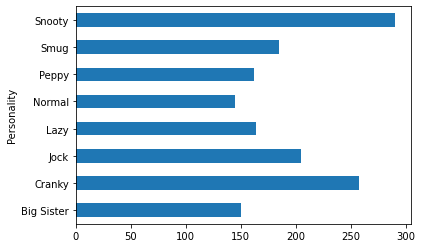

In [66]:
personality = df.groupby('Personality')['Rank'].mean()  # Média de ranking por personalidade
personality.plot(kind='barh')
personality

### Ranking por Hobby

<AxesSubplot:ylabel='Hobby'>

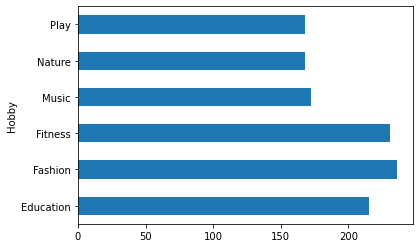

In [67]:
hobby = df.groupby('Hobby')['Rank'].mean()  # Média de ranking por hobby
hobby.plot(kind='barh')

### Ranking por Estilo

Style
Active      218.666667
Cool        219.880952
Cute        135.645161
Elegant     227.871560
Gorgeous    242.315217
Simple      180.500000
Name: Rank, dtype: float64

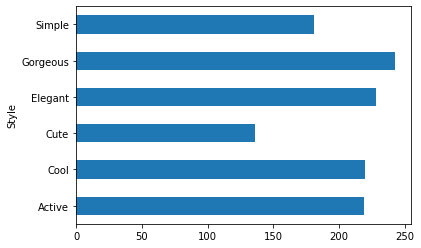

In [70]:
# Extraindo as colunas 'Style 1' e 'Style 2' individualmente do dataframe original para então concatená-las:

s1 = pd.DataFrame(df, columns=['Style 1', 'Rank']).rename(columns={'Style 1': 'Style'})
s2 = pd.DataFrame(df, columns=['Style 2', 'Rank']).rename(columns={'Style 2': 'Style'})
style = pd.concat([s1, s2])

# Agora podemos realizar o agrupamento:
style = style.groupby('Style')['Rank'].mean()  # Média de ranking por estilo
style.plot(kind='barh')
style

### Ranking por Cores

Color
Beige         147.942857
Black         214.347222
Blue          206.321429
Brown         203.322581
Colorful      189.647059
Gray          213.113636
Green         209.926471
Light blue    182.536585
Orange        206.170732
Pink          164.150943
Purple        227.730769
Red           203.937500
White         175.852459
Yellow        201.954545
Name: Rank, dtype: float64

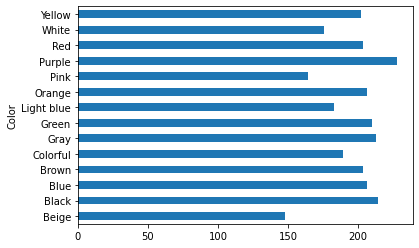

In [71]:
# Extraindo as colunas 'Color 1' e 'Color 2' individualmente do dataframe original para então concatená-las:

c1 = pd.DataFrame(df, columns=['Color 1', 'Rank']).rename(columns={'Color 1': 'Color'})
c2 = pd.DataFrame(df, columns=['Color 2', 'Rank']).rename(columns={'Color 2': 'Color'})
color = pd.concat([c1, c2])

# Agora podemos realizar o agrupamento:
color = color.groupby('Color')['Rank'].mean()  # Média de ranking por cores
color.plot(kind='barh')
color